# Lab 2 Notes

In [121]:
import numpy as np
from tabulate import tabulate 

D1_in =  [16.20, 17.33, 16.66, 18.27, 17.53, 18.98, 19.61, 20.77, 21.80, 22.97, 25.80]
D1_mid = [22.98, 22.32, 23.79, 23.14, 26.58, 27.13, 27.37, 28.88, 31.67, 31.62, 34.14]
D1_out = [42.82, 42.50, 40.58, 43.08, 43.77, 47.01, 47.64, 50.95, 53.29, 55.25, 60.59]

D2_in =  [16.96, 17.18, 16.85, 17.85, 17.94, 19.11, 19.72, 20.27, 22.55, 23.25, 23.73]
D2_mid = [23.83, 23.89, 23.41, 25.06, 25.34, 27.34, 28.81, 30.43, 31.60, 33.36, 34.16]
D2_out = [41.42, 41.82, 43.08, 42.62, 44.73, 50.15, 51.26, 52.04, 54.15, 56.54, 59.08]

D3_in =  [17.70, 18.76, 18.88, 18.98, 19.82, 20.34, 20.06, 21.86, 22.60, 22.40, 23.78]
D3_mid = [24.17, 24.25, 25.38, 25.53, 26.09, 27.67, 28.26, 29.66, 31.58, 33.11, 33.74]
D3_out = [42.08, 43.64, 45.78, 44.92, 45.91, 49.49, 51.27, 50.45, 55.89, 57.20, 55.82]

D4_in =  [16.33, 17.54, 17.82, 18.12, 18.63, 19.48, 21.28, 20.68, 22.08, 22.72, 23.93]
D4_mid = [23.39, 24.56, 24.40, 25.71, 27.00, 28.94, 29.13, 30.57, 32.51, 32.80, 34.74]
D4_out = [41.60, 43.59, 43.50, 43.97, 45.73, 48.44, 50.57, 53.03, 54.43, 55.15, 60.18]

voltages = [5.0, 4.8, 4.6, 4.4, 4.2, 3.8, 3.6, 3.4, 3, 2.8, 2.6]

headers1 = ["Voltages (kV)", "IN 1 (cm)", "MID 1 (cm)", "OUT 1 (cm)", "IN 2 (cm)", "MID 2 (cm)", "OUT 2 (cm)"]
headers2 = ["Voltages (kV)", "IN 3 (cm)", "MID 3 (cm)", "OUT 3 (cm)", "IN 4 (cm)", "MID 4 (cm)", "OUT 4 (cm)"]
print(tabulate(np.transpose([voltages,
               D1_in,D1_mid,D1_out,
               D2_in,D2_mid,D2_out]), headers=headers1))
print()
print(tabulate(np.transpose([voltages,
               D3_in,D3_mid,D3_out,
               D4_in,D4_mid,D4_out]), headers=headers2))

  Voltages (kV)    IN 1 (cm)    MID 1 (cm)    OUT 1 (cm)    IN 2 (cm)    MID 2 (cm)    OUT 2 (cm)
---------------  -----------  ------------  ------------  -----------  ------------  ------------
            5          16.2          22.98         42.82        16.96         23.83         41.42
            4.8        17.33         22.32         42.5         17.18         23.89         41.82
            4.6        16.66         23.79         40.58        16.85         23.41         43.08
            4.4        18.27         23.14         43.08        17.85         25.06         42.62
            4.2        17.53         26.58         43.77        17.94         25.34         44.73
            3.8        18.98         27.13         47.01        19.11         27.34         50.15
            3.6        19.61         27.37         47.64        19.72         28.81         51.26
            3.4        20.77         28.88         50.95        20.27         30.43         52.04
            3       

In [58]:
import numpy as np

def d_ex_fn(D:float) -> float:
    L = 0.13 # m
    R = 0.06715 # m
    num = D * L
    den = L - R + R*np.cos(np.arcsin(D/(2*R)))
    return num/den

def spacing_fn(D_ex:float, V:float, n:int=1) -> float:
    HBAR = 6.6261e-34 /(2*np.pi) # m^2 kg s^-1
    M_E = 9.109e-31 # kg 
    charge = 1.602e-19 # C
    L = 0.13 # m
    num = 4 * np.pi * HBAR * L * np.sqrt(n)
    den = D_ex*np.sqrt(2 * charge * V * M_E)
    return num/den

In [122]:
from tabulate import tabulate

a=0
ins  = [np.mean([d1+a, d2+a, d3+a, d4+a]) for d1, d2, d3, d4 in zip(D1_in, D2_in, D3_in, D4_in)]
mids = [np.mean([d1+a, d2+a, d3+a, d4+a]) for d1, d2, d3, d4 in zip(D1_mid, D2_mid, D3_mid, D4_mid)]
outs = [np.mean([d1+a, d2+a, d3+a, d4+a]) for d1, d2, d3, d4 in zip(D1_out, D2_out, D3_out, D4_out)]

ins_unc  = [np.std([d1+a, d2+a, d3+a, d4+a], ddof=1) for d1, d2, d3, d4 in zip(D1_in, D2_in, D3_in, D4_in)]
mids_unc = [np.std([d1+a, d2+a, d3+a, d4+a], ddof=1) for d1, d2, d3, d4 in zip(D1_mid, D2_mid, D3_mid, D4_mid)]
outs_unc = [np.std([d1+a, d2+a, d3+a, d4+a], ddof=1) for d1, d2, d3, d4 in zip(D1_out[:], D2_out[:], D3_out[:], D4_out[:])]

d_exs_in = [d_ex_fn((d+4)/1000) for d in ins] # meters # edited to make more realistic
spacings_in = [spacing_fn(d_ex, v*1000)*1e9 for d_ex,v in zip(d_exs_in, voltages)] # nm

d_exs_mid = [d_ex_fn((d+4)/1000) for d in mids] # meters # edited to make more realistic
spacings_mid = [spacing_fn(d_ex, v*1000, 2)*1e9 for d_ex,v in zip(d_exs_mid, voltages)] #nm

d_exs_out = [d_ex_fn((d-2)/1000) for d in outs] # meters
spacings_out = [spacing_fn(d_ex, v*1000)*1e9 for d_ex,v in zip(d_exs_out, voltages)] #nm

headings1 = ["Voltages (kV)", 
            "Inner D (mm)", "Middle D (mm)", "Outer D (mm)", 
            "Inner σ (mm)", "Middle σ (mm)", "Outer σ (mm)",]
headings2 = ["Voltages (kV)", 
            "Inner space (nm)", "Middle space (nm)", "Outer space (nm)"]
print(tabulate(np.transpose(np.array([voltages, 
                                      ins, mids, outs, 
                                      ins_unc, mids_unc, outs_unc,])), headers=headings1))
print()
print(tabulate(np.transpose(np.array([voltages,
                                      spacings_in, spacings_mid, spacings_out])), headers=headings2))


  Voltages (kV)    Inner D (mm)    Middle D (mm)    Outer D (mm)    Inner σ (mm)    Middle σ (mm)    Outer σ (mm)
---------------  --------------  ---------------  --------------  --------------  ---------------  --------------
            5           16.7975          23.5925         41.98          0.687138         0.518355        0.62546
            4.8         17.7025          23.755          42.8875        0.720295         0.995071        0.884962
            4.6         17.5525          24.245          43.235         1.02044          0.859554        2.13075
            4.4         18.305           24.86           43.6475        0.48239          1.17895         1.01671
            4.2         18.48            26.2525         45.035         1.00203          0.712993        0.990269
            3.8         19.4775          27.77           48.7725        0.612774         0.811049        1.36983
            3.6         20.1675          28.3925         50.185         0.766002         0.7

In [133]:

print(f"The separation to cause the INNER ring is {np.average(spacings_in)} nm +/- {np.std(spacings_in)} nm")
print(f"The separation to cause the MIDDLE ring is {np.average(spacings_mid)} nm +/- {np.std(spacings_mid)} nm")
print(f"The separation to cause the OUTER ring is {np.average(spacings_out)} nm +/- {np.std(spacings_out)} nm")
print()
print(f"A simple standad deviation of each is {np.std(spacings_in)} and {np.std(spacings_out)}")

The separation to cause the INNER ring is 0.21714757137682564 nm +/- 0.002883034980968281 nm
The separation to cause the MIDDLE ring is 0.22839621712573474 nm +/- 0.0027372608734796584 nm
The separation to cause the OUTER ring is 0.10838874125129544 nm +/- 0.0025157431335227267 nm

A simple standad deviation of each is 0.002883034980968281 and 0.0025157431335227267


In [129]:
# error prop

HBAR = 6.63e-34/(2*np.pi) # m^2 kg / s
PI = np.pi # unitless
R = 0.066 # m 
E = 1.602e-19 # C
M = 9.11e-31 # kg

def der_L(L, V, D, n=1):
    return 4 * np.sqrt(2) * PI * n * HBAR

def der_V(L, V, D, n=1):
    num = -2 * np.sqrt(2) * n * PI * HBAR * (L - R + 0.5 * np.sqrt(4*R**2 - D**2))
    den = D * np.sqrt(E * M) * V**(3/2)
    return num/den

def der_D(L, V, D, n=1):
    a = D**2/(np.sqrt(R**2 - (D**2)/4))
    b = 4 * (L - R + np.sqrt(R**2 - (D**2)/4))
    num = -PI * HBAR * (a + b)
    den = D**2 * np.sqrt(2* E * V * M)
    return num/den

def sigma_d(L, sigma_L, V, sigma_V, D, sigma_D, n=1):
    args = (L, V, D, n)
    var = (der_L(*args) * sigma_L)**2 + (der_V(*args) * sigma_V)**2 + (der_D(*args) * sigma_D)**2
    return np.sqrt(var)

N = len(voltages)
sigma_L = 0.002 # m
sigma_V = 100 # V
L = 0.13 # m

d_in_uncs = [sigma_d(L, sigma_L, V*1000, sigma_V, D/1000, sigma_D/(1e9))*(1e9) 
             for V, D, sigma_D 
             in zip(voltages, ins, ins_unc)]
d_mid_uncs = [sigma_d(L, sigma_L, V*1000, sigma_V, D/1000, sigma_D/(1e9))*(1e9) 
             for V, D, sigma_D 
             in zip(voltages, mids, mids_unc)]
d_out_uncs = [sigma_d(L, sigma_L, V*1000, sigma_V, D/1000, sigma_D/(1e9))*(1e9) 
             for V, D, sigma_D 
             in zip(voltages, outs, outs_unc)]

print(tabulate(np.transpose(np.array([voltages, d_in_uncs, d_mid_uncs, d_out_uncs])),
               headers=["Voltages (v)", "Sigma d_in (nm)", "Sigma d_mid", "Sigma d_out"]))

print(f"A simple standad deviation of each is {np.average(d_in_uncs)} and {np.average(d_out_uncs)}")


  Voltages (v)    Sigma d_in (nm)    Sigma d_mid    Sigma d_out
--------------  -----------------  -------------  -------------
           5           0.00535039     0.00379391     0.00209307
           4.8         0.00539496     0.00400544     0.0021755
           4.6         0.0058002      0.00418172     0.00229918
           4.4         0.00594288     0.0043575      0.0024331
           4.2         0.00631144     0.00441987     0.00252361
           3.8         0.00695429     0.00484917     0.00269241
           3.6         0.0072808      0.00514082     0.00283122
           3.4         0.007653       0.00531431     0.00299188
           3           0.00866073     0.00600713     0.00340564
           2.8         0.0093585      0.0064768      0.0036586
           2.6         0.00981406     0.00691618     0.00386682
A simple standad deviation of each is 0.007138296687202742 and 0.0028155475152570344


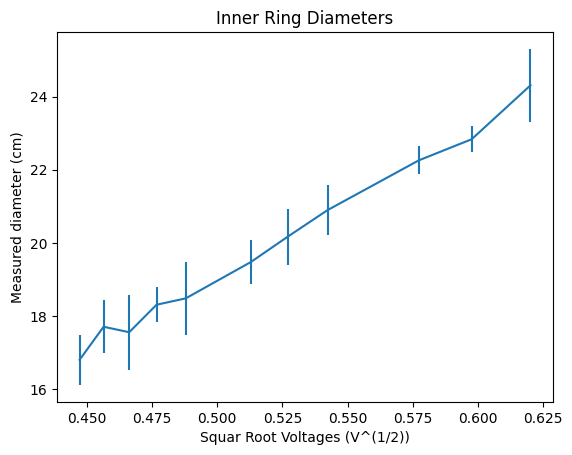

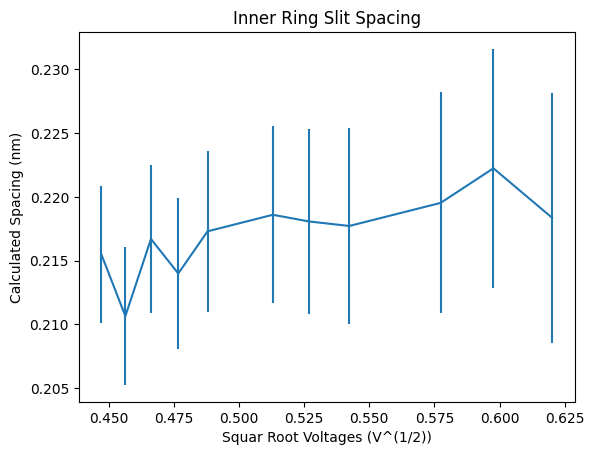

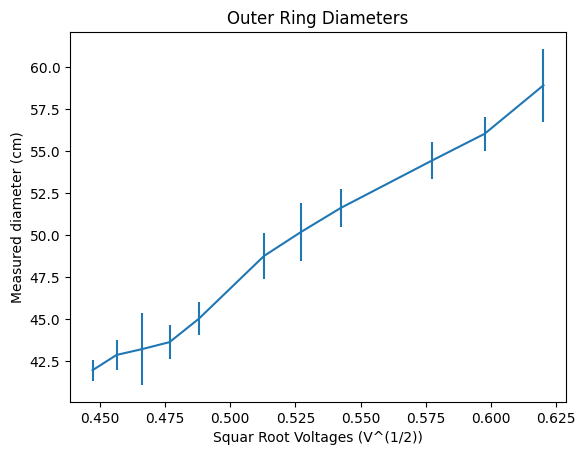

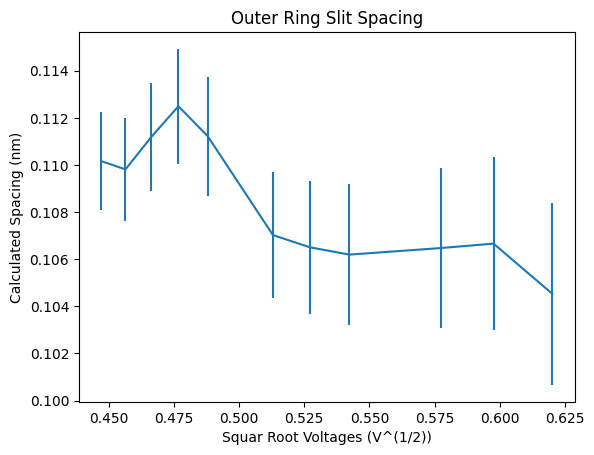

In [125]:
import matplotlib.pyplot as plt

sq_v = np.array([1/np.sqrt(v) for v in voltages])

plt.errorbar(sq_v, ins, ins_unc)
plt.xlabel("Squar Root Voltages (V^(1/2))")
plt.ylabel("Measured diameter (cm)")
plt.title("Inner Ring Diameters")
plt.show()

plt.errorbar(sq_v, spacings_in, d_in_uncs)
plt.xlabel("Squar Root Voltages (V^(1/2))")
plt.ylabel("Calculated Spacing (nm)")
plt.title("Inner Ring Slit Spacing")
plt.show()

plt.errorbar(sq_v, outs, outs_unc)
plt.xlabel("Squar Root Voltages (V^(1/2))")
plt.ylabel("Measured diameter (cm)")
plt.title("Outer Ring Diameters")
plt.show()

plt.errorbar(sq_v, spacings_out, d_out_uncs)
plt.xlabel("Squar Root Voltages (V^(1/2))")
plt.ylabel("Calculated Spacing (nm)")
plt.title("Outer Ring Slit Spacing")
plt.show()


In [132]:
(0.213-0.217)/0.213

-0.018779342723004713